In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense



In [24]:
df = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')

In [25]:
df.dropna(inplace=True)

In [26]:
df = df.drop(['High', 'Low', 'Close', 'Volume', 'Name'], axis=1)

In [27]:
train_size = int(df.shape[0]*0.8)

In [28]:
train = df.iloc[:train_size, 1]
test = df.iloc[train_size:, 1]

In [29]:
train = np.array(train).reshape(-1, 1)
test = np.array(test).reshape(-1, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [31]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [32]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [33]:
model = Sequential()
model.add(Dense(12, input_dim = 1, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                24        
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
76/76 [==============================] - 1s 5ms/step - loss: 0.1598 - val_loss: 0.0029
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0408 - val_loss: 0.0018
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0035
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0039
Epoch 5/100
76/76 [==============================] - 0s 4m

Epoch 72/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5737e-04 - val_loss: 6.0163e-04
Epoch 73/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5391e-04 - val_loss: 6.0222e-04
Epoch 74/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5280e-04 - val_loss: 5.9667e-04
Epoch 75/100
76/76 [==============================] - 0s 4ms/step - loss: 6.7067e-04 - val_loss: 5.8474e-04
Epoch 76/100
76/76 [==============================] - 0s 4ms/step - loss: 6.7507e-04 - val_loss: 5.8323e-04
Epoch 77/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5514e-04 - val_loss: 5.8413e-04
Epoch 78/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5377e-04 - val_loss: 5.9977e-04
Epoch 79/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5586e-04 - val_loss: 5.8531e-04
Epoch 80/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5731e-04 - val_loss: 5.9080e-04
Epoch 81/100
76/76 [========

In [34]:
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


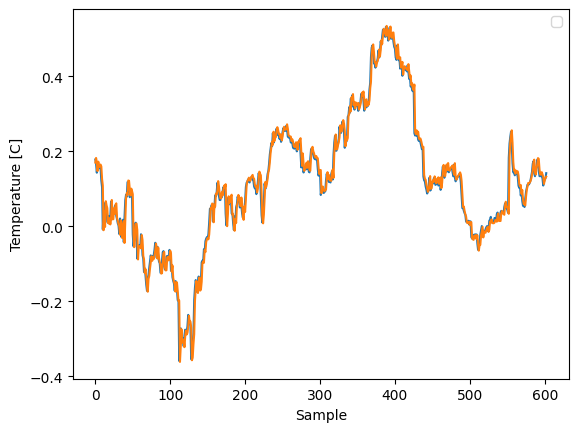

In [35]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("Sample")
plt.ylabel("Temperature [C]")
plt.legend()

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9798054825554211